### Plotting the estimated parameters

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [16]:
train = pd.read_csv('data_train.csv',names=['A','B','C','D'])
test = pd.read_csv('data_test.csv',names=['A','B','C','D'])

In [108]:
x=train['A']
y=train['B']
z=train['C']
h=train['D']

x_t=test['A']
y_t=test['B']

z_t=test['C']
h_t=test['D']

x = (x-x.mean()) / x.std()
y = (y-y.mean()) / y.std()
z = (z-z.mean()) / z.std()
h = (z-z.mean()) / h.std()


x_t = (x_t-x_t.mean()) / x_t.std()
y_t = (y_t-y_t.mean()) / y_t.std()
z_t = (z_t-z_t.mean()) / z_t.std()
h_t = (z_t-z_t.mean()) / h_t.std()

train_matrix = np.c_[np.ones(h.shape[0]),x,y,z]
test_matrix = np.c_[np.ones(h_t.shape[0]),x_t,y_t,z_t]


# train_matrix = np.c_[np.ones(x.shape[0]),x,y,z]

In [129]:
alpha = 0.001
iteration = 5000
m = h.size
np.random.seed(101)
theta = np.random.rand(4)

In [162]:
def gradient_descent(matrix,h,theta,iterations,alpha):
    cost_history=[]
    theta_history=[theta]
    for i in range(iterations):
        predict= np.dot(matrix,theta)
        loss = predict - h
        cost_function = 1/(2*m) * np.dot(loss.T,loss)
        cost_history.append(cost_function)
        theta = theta - (alpha*(1/m)*np.dot(matrix.T,loss))
        theta_history.append(theta)
    return theta_history,cost_history 

theta_history,cost_history=gradient_descent(train_matrix,h,theta,iteration,alpha)

theta_history_t,cost_history_t = gradient_descent(test_matrix,h_t,theta,iteration,alpha)


In [163]:
theta0 =[]
theta1 =[]
theta2 =[]
theta3 =[]
for i in range(iteration):
    theta0.append(theta_history[i][0])
    theta1.append(theta_history[i][1])
    theta2.append(theta_history[i][2])
    theta3.append(theta_history[i][3])


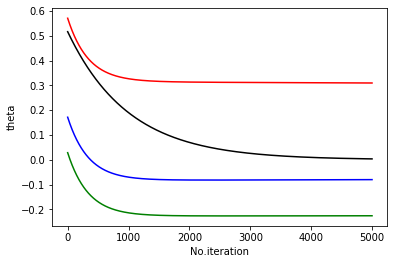

In [164]:
plt.ylabel('theta')
plt.xlabel('No.iteration')
plt.plot(theta0,c='k')
plt.plot(theta1,c='r')
plt.plot(theta2,c='g')
plt.plot(theta3,c='b')
plt.show()

###  Plotting the training error

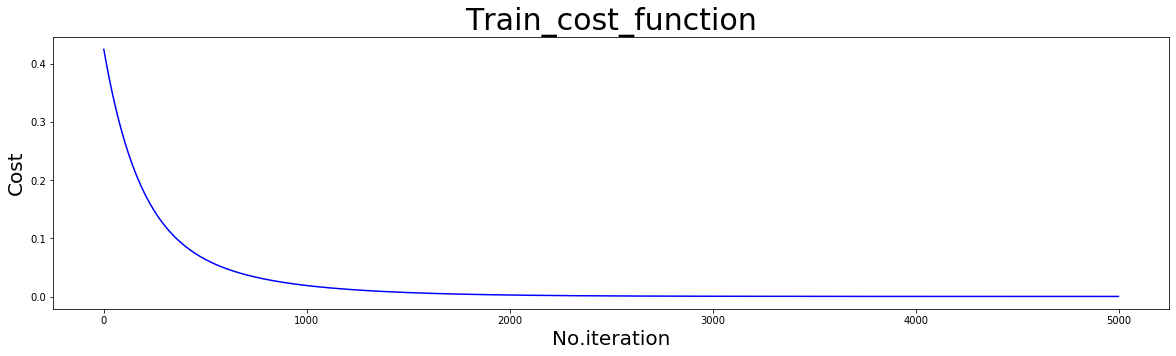

In [165]:
plt.figure(figsize=(20, 5))
plt.title('Train_cost_function',size = 30)
plt.ylabel('Cost',size = 20)
plt.xlabel('No.iteration',size = 20)
plt.plot(cost_history,c='b')
plt.show()

###  Plotting the testing error

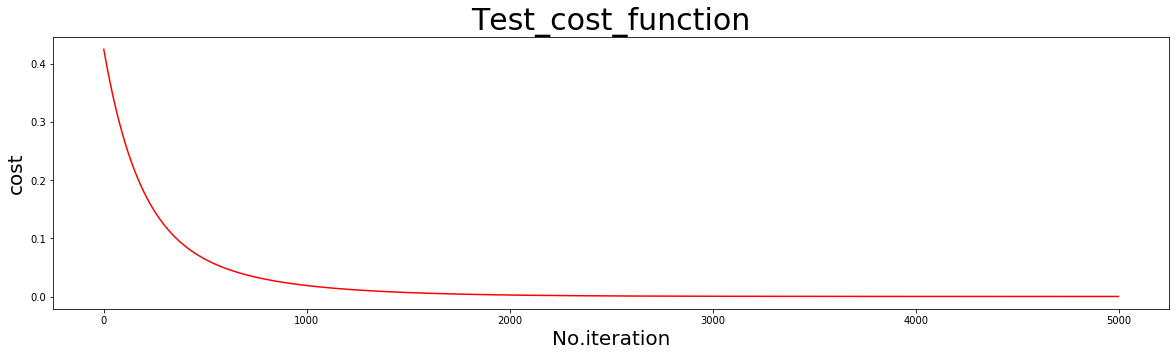

In [166]:

plt.figure(figsize=(20, 5))
plt.title('Test_cost_function',size = 30)
plt.ylabel('cost',size = 20)
plt.xlabel('No.iteration',size = 20)
plt.plot(cost_history_t,c='r')
plt.show()